数据来自某交易平台的二手车交易记录，总数据量超过40w，包含31列变量信息，其中15列为匿名变量。为了保证比赛的公平性，将会从中抽取15万条作为训练集，5万条作为测试集A，5万条作为测试集B，同时会对name、model、brand和regionCode等信息进行脱敏。
数据集来源：https://tianchi.aliyun.com/competition/entrance/231784/introduction?spm=5176.12281925.0.0.6d7a7137swSdM5


## 数据分析步骤
   1. 提出问题
   2. 理解数据
   3. 数据清洗
   4. 构建模型
   5. 数据可视化

## 1.提出问题
* 根据某交易平台的二手车交易记录，预测二手车的价格

In [2]:
# 导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
color = sns.color_palette()

In [4]:
# 导入数据集 

df = pd.read_csv('./used_car_train_20200313_recover.csv',sep=' ')

In [5]:
# # 查看数据的基本信息
df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [7]:
'''
'SaleID',交易ID，唯一编码
 'name',汽车交易名称，已脱敏
 'regDate',汽车注册日期，例如20160101，2016年01月01日
 'model',车型编码，已脱敏
 'brand',汽车品牌，已脱敏
 'bodyType',车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7
 'fuelType',燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6
 'gearbox',变速箱：手动：0，自动：1
 'power',发动机功率：范围 [ 0, 600 ]
 'kilometer',汽车已行驶公里，单位万km
 'notRepairedDamage',汽车有尚未修复的损坏：是：0，否：1
 'regionCode',地区编码，已脱敏
 'seller',销售方：个体：0，非个体：1
 'offerType',报价类型：提供：0，请求：1
 'creatDate',汽车上线时间，即开始售卖时间
 'price',二手车交易价格（预测目标）

另外还有15个匿名特征

'''

"\n'SaleID',交易ID，唯一编码\n 'name',汽车交易名称，已脱敏\n 'regDate',汽车注册日期，例如20160101，2016年01月01日\n 'model',车型编码，已脱敏\n 'brand',汽车品牌，已脱敏\n 'bodyType',车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7\n 'fuelType',燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6\n 'gearbox',变速箱：手动：0，自动：1\n 'power',发动机功率：范围 [ 0, 600 ]\n 'kilometer',汽车已行驶公里，单位万km\n 'notRepairedDamage',汽车有尚未修复的损坏：是：0，否：1\n 'regionCode',地区编码，已脱敏\n 'seller',销售方：个体：0，非个体：1\n 'offerType',报价类型：提供：0，请求：1\n 'creatDate',汽车上线时间，即开始售卖时间\n 'price',二手车交易价格（预测目标）\n\n另外还有15个匿名特征\n\n"

In [8]:
columns = list(df.columns)

### 数据清洗

* 共有四个特征model,bodyType,fuelType,gearbox  有缺失值，需要对数据进行清洗
* 使用用众数对缺失值进行填充

In [9]:
# 查看以上四个特征的众数
df['model'].value_counts()
df['bodyType'].value_counts()
df['fuelType'].value_counts()
df['gearbox'].value_counts()

0.0    111623
1.0     32396
Name: gearbox, dtype: int64

In [10]:
# 使用众数0填充缺失值
df['model'] = df['model'].fillna(0)
df['bodyType'] = df['bodyType'].fillna(0)
df['fuelType'] = df['fuelType'].fillna(0)
df['gearbox'] = df['gearbox'].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

## 特征工程

 regDate,creatDate,通过生产时间和售卖时间计算出二手车的使用时间

In [170]:
df['regDate'] =pd.to_datetime(df['regDate'].apply(lambda x: pd.to_datetime(str(x))),format="%Y-%m-%d")
# 发现数据有异常值，

ParserError: month must be in 1..12: 20020006

In [12]:
# 修改redDate 中的异常值 
df['regDate'] = df['regDate'].apply(lambda x:x if (x//100%100!=0) else x+100)

In [13]:
df['regDate'] =pd.to_datetime(df['regDate'].apply(lambda x: pd.to_datetime(str(x))),format="%Y-%m-%d")
df['creatDate'] =pd.to_datetime(df['creatDate'].apply(lambda x: pd.to_datetime(str(x))),format="%Y-%m-%d")

In [15]:
# 得到一个二手车使用天数的特征
df['use_days'] = df['creatDate']-df['regDate']
df['use_days']

0        4385 days
1        4757 days
2        4382 days
3        7125 days
4        1531 days
            ...   
149995   5772 days
149996   2322 days
149997   2003 days
149998   3673 days
149999   6239 days
Name: use_days, Length: 150000, dtype: timedelta64[ns]

In [16]:
# 定义一个字符串分割函数 用来将提取使用天数
def split_days(time_colser):
    timelist = []
    for value in time_colser:
        dateStr = str(value).split(' ')[0]
        timelist.append(dateStr)
    
    time_ser = pd.Series(timelist)
    return time_ser

In [17]:
time_ser = df.loc[:,'use_days']
date_ser = split_days(time_ser)
# 将分割好的这一列返回给df
df.loc[:,'use_days'] = date_ser
df['use_days'] = df['use_days'].astype('int64')

In [188]:
df['use_days'] = df['use_days'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             150000 non-null  int64         
 1   name               150000 non-null  int64         
 2   regDate            150000 non-null  datetime64[ns]
 3   model              150000 non-null  float64       
 4   brand              150000 non-null  int64         
 5   bodyType           150000 non-null  float64       
 6   fuelType           150000 non-null  float64       
 7   gearbox            150000 non-null  float64       
 8   power              150000 non-null  int64         
 9   kilometer          150000 non-null  float64       
 10  notRepairedDamage  150000 non-null  object        
 11  regionCode         150000 non-null  int64         
 12  seller             150000 non-null  int64         
 13  offerType          150000 non-null  int64   

In [19]:
corr_df = df.corr()
corr_df


,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,use_days
SaleID,1.000000,-0.002299,0.000665,-0.001754,-0.005266,-0.001885,0.001493,0.000873,-0.001115,-0.001078,...,-0.000397,0.001164,-0.000046,-0.000749,0.000983,0.001276,0.000249,0.000162,-0.000209,0.001410
name,-0.002299,1.000000,0.016071,0.040678,0.023692,0.002182,0.024559,0.000236,-0.007613,0.005603,...,-0.638191,0.057199,0.235341,0.008455,0.576758,-0.258582,0.090897,0.007558,-0.011303,0.038684
model,0.000665,0.016071,1.000000,0.358724,0.206967,0.054219,0.022426,0.031243,-0.087426,0.010245,...,0.015424,-0.100748,0.211122,0.423468,-0.058676,-0.079655,0.110154,0.399845,-0.513665,-0.149241
brand,-0.001754,0.040678,0.358724,1.000000,0.109581,-0.077987,0.011131,-0.022391,-0.096262,-0.002326,...,-0.031185,-0.050022,0.015200,0.352137,0.043222,0.007571,-0.070912,0.320933,-0.207713,-0.032749
bodyType,-0.005266,0.023692,0.206967,0.109581,1.000000,0.126021,0.105994,0.089383,-0.048769,0.015807,...,0.004448,-0.253291,0.207122,-0.016177,-0.144700,-0.305006,0.127137,-0.019593,-0.269355,-0.108981
fuelType,-0.001885,0.002182,0.054219,-0.077987,0.126021,1.000000,0.170335,0.063186,0.091928,-0.012749,...,0.018920,-0.057510,0.278188,-0.112115,-0.108157,-0.154984,0.273916,-0.038199,-0.018130,-0.284843
gearbox,0.001493,0.024559,0.022426,0.011131,0.105994,0.170335,1.000000,0.164073,-0.043920,-0.021148,...,0.007135,-0.028050,0.237634,-0.245238,-0.094537,-0.153459,0.270717,-0.194907,-0.041478,-0.145499
power,0.000873,0.000236,0.031243,-0.022391,0.089383,0.063186,0.164073,1.000000,-0.019631,0.004422,...,0.025648,-0.060397,0.155956,-0.140203,-0.092717,-0.122107,0.161990,-0.103430,-0.023808,-0.098411
kilometer,-0.001115,-0.007613,-0.087426,-0.096262,-0.048769,0.091928,-0.043920,-0.019631,1.000000,-0.010590,...,-0.024664,-0.017835,-0.407686,-0.149422,0.083358,0.066542,-0.370153,-0.285158,-0.120389,0.491128
regionCode,-0.001078,0.005603,0.010245,-0.002326,0.015807,-0.012749,-0.021148,0.004422,-0.010590,1.000000,...,0.028838,0.000609,-0.001227,-0.016659,-0.024333,0.016807,0.002261,-0.001976,-0.009702,0.005305


In [20]:
corr_df['price'].sort_values(ascending=False)

price         1.000000
v_12          0.692823
v_8           0.685798
v_0           0.628397
gearbox       0.330353
bodyType      0.248609
power         0.219834
fuelType      0.209510
v_5           0.164317
model         0.136933
v_2           0.085322
v_6           0.068970
v_1           0.060914
v_14          0.035911
regionCode    0.014036
name          0.002030
SaleID       -0.001043
seller       -0.002004
v_13         -0.013993
brand        -0.043799
v_7          -0.053024
v_4          -0.147085
v_9          -0.206205
v_10         -0.246175
v_11         -0.275320
kilometer    -0.440519
use_days     -0.612014
v_3          -0.730946
offerType          NaN
Name: price, dtype: float64

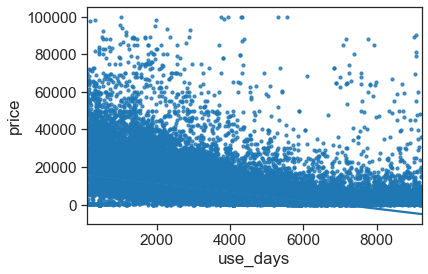

In [193]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

# plot figure
plt.figure(figsize = (6,4))
sns.regplot(x='use_days', y = 'price', data = df, scatter_kws = {'s':10})
plt.show()

# 途中可以看出，使用天数和价格有反比，即使用越久，价格越低

In [194]:
df['bodyType'].value_counts()

0.0    45926
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64

## 特征选择

选取特征相关性大于0.2的特征进行机器学习

In [21]:
df_finally = df[['v_12','v_8','v_0','gearbox','bodyType','power','fuelType','use_days','v_3','kilometer','v_11','v_10','v_9']]
df_finally

,v_12,v_8,v_0,gearbox,bodyType,power,fuelType,use_days,v_3,kilometer,v_11,v_10,v_9
0,-2.420821,0.022816,43.357796,0.0,1.0,60,0.0,4385,2.159744,12.5,2.804097,-2.881803,0.097462
1,-1.030483,0.026597,45.305273,0.0,2.0,0,0.0,4757,1.380657,15.0,2.096338,-4.900482,0.020582
2,1.565330,0.062173,45.978359,0.0,1.0,163,0.0,4382,-0.998467,12.5,1.803559,-4.846749,0.027075
3,-0.501868,0.033395,45.687478,1.0,0.0,193,0.0,7125,0.883600,15.0,1.285940,-4.509599,0.000000
4,0.931110,0.078819,44.383511,0.0,1.0,68,0.0,1531,-1.571239,5.0,0.910783,-1.896240,0.121534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.589167,0.071158,45.316543,1.0,4.0,163,0.0,5772,-0.736609,15.0,-2.983973,1.988114,0.019174
149996,2.553994,0.099681,45.972058,0.0,0.0,125,0.0,2322,-2.366699,10.0,-2.774615,1.839166,0.079371
149997,2.290197,0.100118,44.733481,0.0,1.0,90,1.0,2003,-2.279091,6.0,-1.630677,2.439812,0.097914
149998,1.414937,0.083558,45.658634,0.0,3.0,156,1.0,3673,-1.179812,15.0,-2.633719,2.075380,0.081498


In [22]:
y_price = df['price']

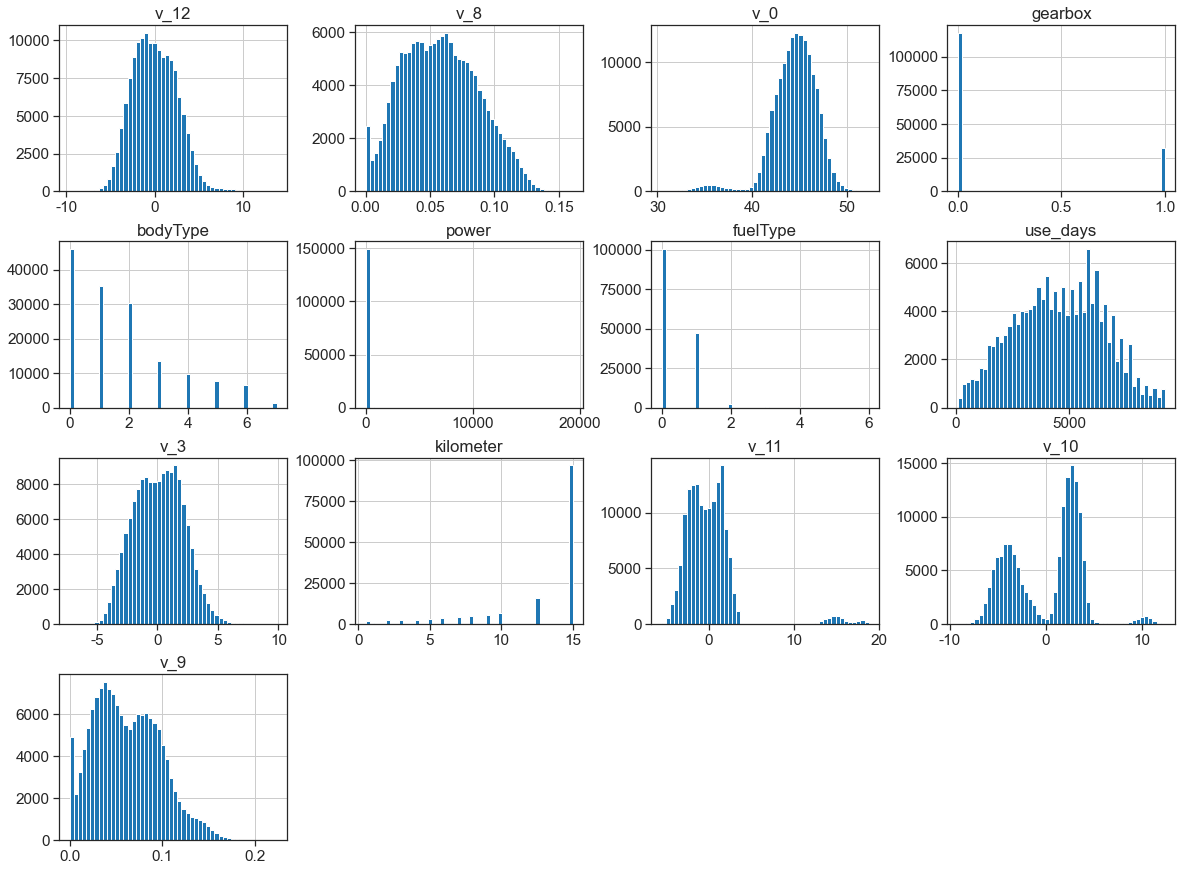

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
df_finally.hist(bins=50,figsize=(20,15),)
plt.show()

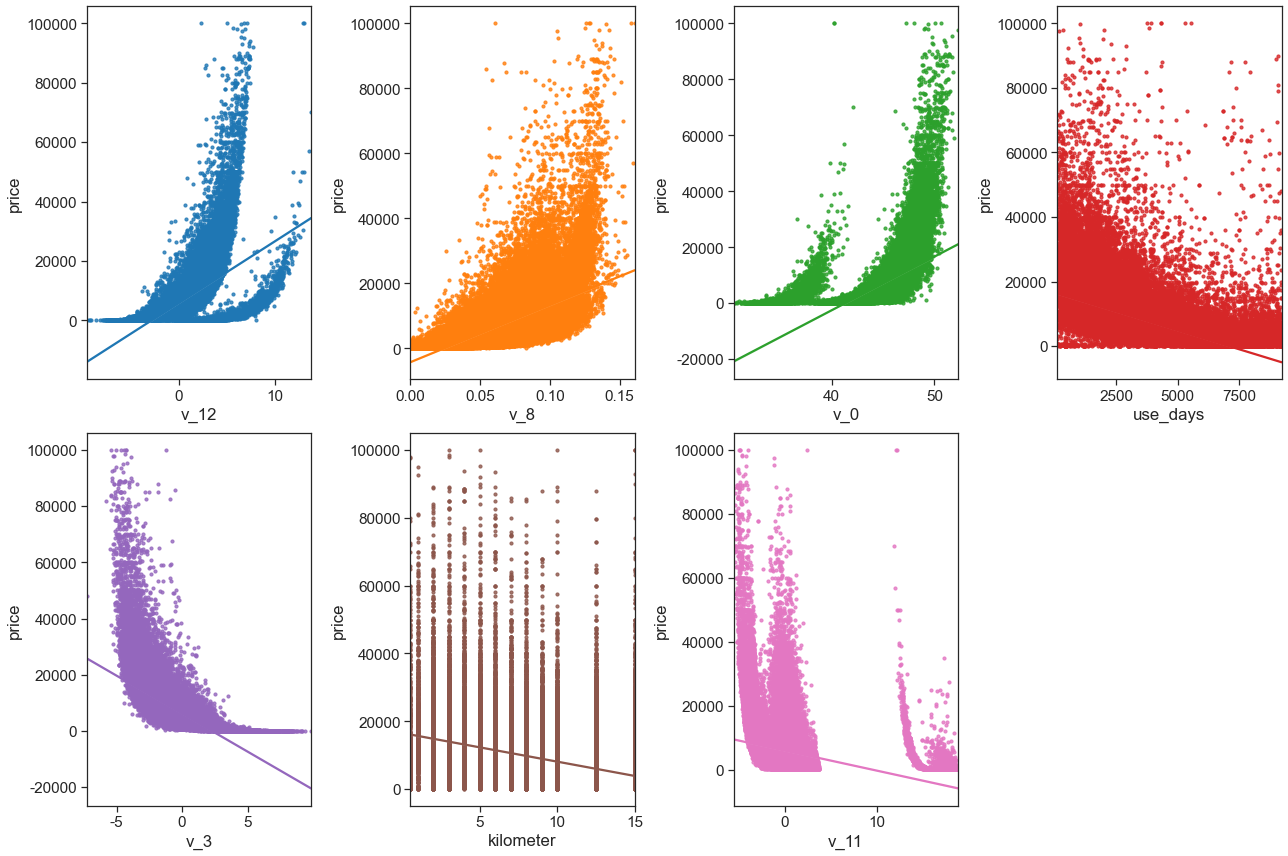

In [218]:
col_list = ['v_12','v_8','v_0','use_days','v_3','kilometer','v_11']


plt.figure(figsize = (18,12))

for i in range(7):
    plt.subplot(2,4,i+1)
    sns.regplot(x=col_list[i], y = df['price'], data = df, scatter_kws = {'s':10},color = color[i])
plt.tight_layout()


### 划分训练集和测试集

In [195]:
# 使用随机抽样划分训练集和测试集

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df_finally,y_price,test_size=0.2,random_state=42)

In [25]:
# 线性回归模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
lin_reg.score(X_test,y_test)

0.6652186914686578

In [208]:
# 决策树模型
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [209]:
tree_reg.score(X_test,y_test)

0.9142513147299799

#### 交叉验证

In [210]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [212]:
# 线性 交叉验证
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4410.46256726 4466.19376943 4491.16436984 4265.01040169 4187.72113384
 4436.51595118 4374.17025563 4529.80230022 4317.55531048 4256.72629113]
Mean: 4373.532235070616
Standard deviation: 107.35679560650489


In [27]:
# 线性模型误差
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test,y_predict)
lin_mse

18353025.56995861

In [28]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4284.043133531525